<a href="https://colab.research.google.com/github/HS587885/Studying-MachineLearning/blob/main/%EB%AF%B8%EC%88%A0%EC%9E%91%ED%92%882.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/data/ball_data/train.zip -d /content/train/
!unzip /content/drive/MyDrive/data/ball_data/test.zip  -d /content/test/

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D, Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from glob import glob
from PIL import Image
import cv2
import albumentations as A
from tqdm import tqdm

In [2]:
import cv2

# 이미지 불러오기
image_path = "/content/train/baseball/baseball_0.jpg"  # 이미지 파일 경로
image = cv2.imread(image_path)

# 이미지의 크기 확인
image_size = (image.shape[1], image.shape[0])  # OpenCV에서는 (세로, 가로) 순서로 크기가 반환됩니다.
print("이미지 크기:", image_size)

# 이미지 배열의 형태 확인
print("이미지 배열의 형태:", image.shape)


이미지 크기: (225, 225)
이미지 배열의 형태: (225, 225, 3)


In [3]:
from glob import glob

# 각 종류별로 이미지 경로 수집
american_football = glob('/content/train/american_football/*jpg')
baseball = glob('/content/train/baseball/*jpg')
basketball = glob('/content/train/basketball/*jpg')
billiard_ball = glob('/content/train/billiard_ball/*jpg')
bowling_ball = glob('/content/train/bowling_ball/*jpg')
cricket_ball = glob('/content/train/cricket_ball/*jpg')
football = glob('/content/train/football/*jpg')
golf_ball = glob('/content/train/golf_ball/*jpg')
hockey_ball = glob('/content/train/hockey_ball/*jpg')
hockey_puck = glob('/content/train/hockey_puck/*jpg')
rugby_ball = glob('/content/train/rugby_ball/*jpg')
shuttlecock = glob('/content/train/shuttlecock/*jpg')
table_tennis_ball = glob('/content/train/table_tennis_ball/*jpg')
tennis_ball = glob('/content/train/tennis_ball/*jpg')
volleyball = glob('/content/train/volleyball/*jpg')

# 모든 경로를 하나의 리스트에 결합
train_path = american_football + baseball + basketball + billiard_ball + bowling_ball + \
             cricket_ball + football + golf_ball + hockey_ball + hockey_puck + \
             rugby_ball + shuttlecock + table_tennis_ball + tennis_ball + volleyball

# 각 이미지 카테고리에 대한 레이블 생성
labels = [0] * len(american_football) + [1] * len(baseball) + [2] * len(basketball) + \
         [3] * len(billiard_ball) + [4] * len(bowling_ball) + [5] * len(cricket_ball) + \
         [6] * len(football) + [7] * len(golf_ball) + [8] * len(hockey_ball) + \
         [9] * len(hockey_puck) + [10] * len(rugby_ball) + [11] * len(shuttlecock) + \
         [12] * len(table_tennis_ball) + [13] * len(tennis_ball) + [14] * len(volleyball)


In [4]:
from sklearn.model_selection import train_test_split
from PIL import Image

train_img = [np.array(Image.open(path).resize((224,224),).convert('RGB')) for path in train_path]
train_img = np.array(train_img)
train_img.shape

(7328, 224, 224, 3)

<ipython-input-5-1a85a33f1d54>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=label_list, palette=class_colors.values())


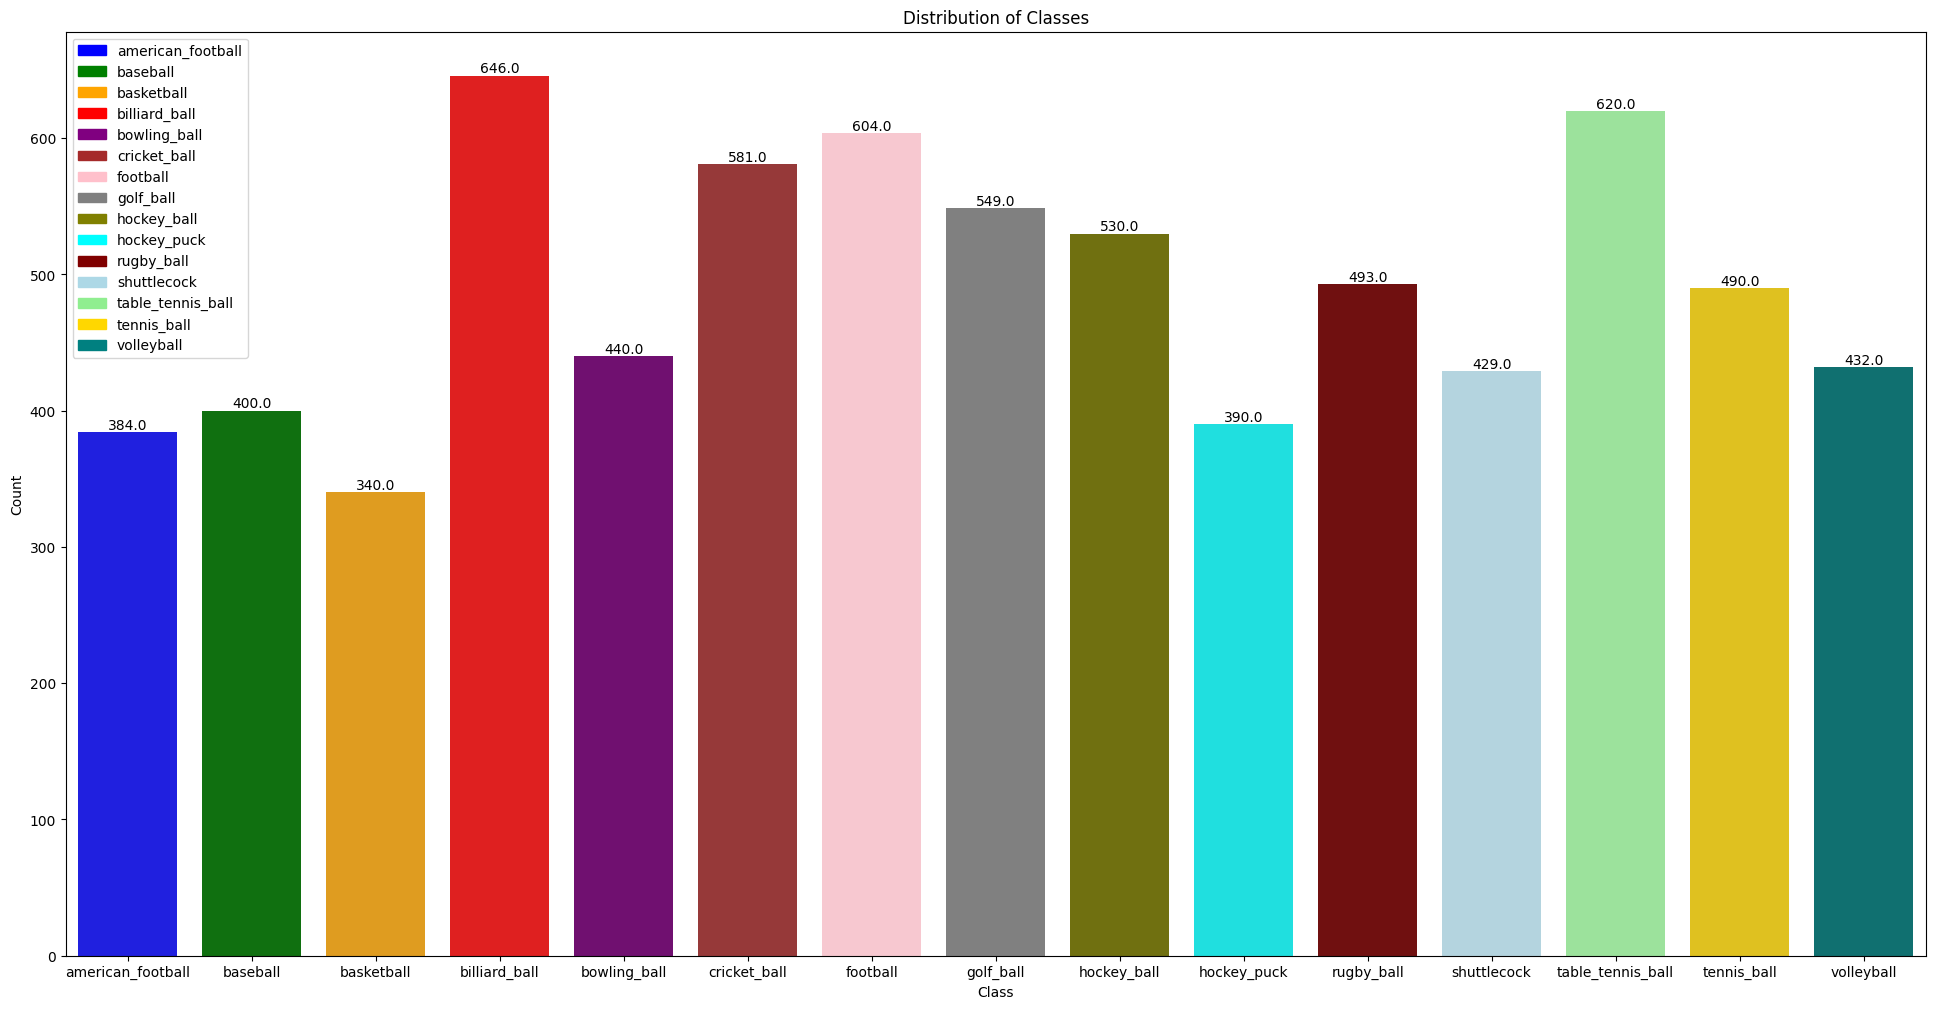

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 새로운 클래스 목록에 따른 레이블 리스트 생성
label_list = ['american_football'] * len(american_football) + ['baseball'] * len(baseball) + \
             ['basketball'] * len(basketball) + ['billiard_ball'] * len(billiard_ball) + \
             ['bowling_ball'] * len(bowling_ball) + ['cricket_ball'] * len(cricket_ball) + \
             ['football'] * len(football) + ['golf_ball'] * len(golf_ball) + \
             ['hockey_ball'] * len(hockey_ball) + ['hockey_puck'] * len(hockey_puck) + \
             ['rugby_ball'] * len(rugby_ball) + ['shuttlecock'] * len(shuttlecock) + \
             ['table_tennis_ball'] * len(table_tennis_ball) + ['tennis_ball'] * len(tennis_ball) + \
             ['volleyball'] * len(volleyball)

# 각 클래스에 대한 색상 지정
class_colors = {
    'american_football': 'blue',
    'baseball': 'green',
    'basketball': 'orange',
    'billiard_ball': 'red',
    'bowling_ball': 'purple',
    'cricket_ball': 'brown',
    'football': 'pink',
    'golf_ball': 'gray',
    'hockey_ball': 'olive',
    'hockey_puck': 'cyan',
    'rugby_ball': 'maroon',
    'shuttlecock': 'lightblue',
    'table_tennis_ball': 'lightgreen',
    'tennis_ball': 'gold',
    'volleyball': 'teal'
}

# 클래스 분포 시각화
plt.figure(figsize=(24, 12))
ax = sns.countplot(x=label_list, palette=class_colors.values())
ax.set_title('Distribution of Classes')
ax.set_xlabel('Class')
ax.set_ylabel('Count')

# 각 막대에 데이터 수 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# 범례 생성
handles = [patches.Rectangle((0,0),1,1, color=color) for color in class_colors.values()]
ax.legend(handles, class_colors.keys())

plt.show()


# 각 클래스의 이미지 개수 계산
class_counts = {
    'american_football': len(american_football),
    'baseball': len(baseball),
    'basketball': len(basketball),
    'billiard_ball': len(billiard_ball),
    'bowling_ball': len(bowling_ball),
    'cricket_ball': len(cricket_ball),
    'football': len(football),
    'golf_ball': len(golf_ball),
    'hockey_ball': len(hockey_ball),
    'hockey_puck': len(hockey_puck),
    'rugby_ball': len(rugby_ball),
    'shuttlecock': len(shuttlecock),
    'table_tennis_ball': len(table_tennis_ball),
    'tennis_ball': len(tennis_ball),
    'volleyball': len(volleyball)
}

# 클래스별 이미지 개수 출력
for class_name, count in class_counts.items():
    print(f'{class_name}: {count}')



In [5]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_img, labels, test_size =0.2, stratify=labels, random_state=42 )

In [6]:
X_train.shape

(5862, 224, 224, 3)

In [7]:
np.unique(y_valid)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
# # 각 채널에 대한 평균 계산
# mean = np.mean(X_train, axis=(0, 1, 2))

# # 각 채널에 대한 표준 편차 계산
# std = np.std(X_train, axis=(0, 1, 2))

# print("Mean of the training set:", mean)
# print("Standard deviation of the training set:", std)

In [8]:
# Training params.
batch_size = 32
img_height, img_width = 224, 224

epochs = 10
# Network architecture params.
num_classes = 15

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 증강 설정과 함께 이미지 정규화 적용
data_gen = ImageDataGenerator(
    rescale=1./255,  # 픽셀 값을 [0, 1] 범위로 정규화
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 데이터 증강이 적용된 이미지를 배치로 생성
train_generator = data_gen.flow(X_train, y_train, batch_size=batch_size, shuffle=True)
# 검증 데이터에 대한 ImageDataGenerator 생성 (데이터 증강 없이 정규화만 적용)
valid_datagen = ImageDataGenerator(rescale=1./255)#

# 검증 데이터셋을 배치로 생성
valid_generator = valid_datagen.flow(X_valid, y_valid, batch_size=batch_size)


In [10]:
# EfficientNetB2 모델 정의
base_model = tf.keras.applications.EfficientNetB5(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# 모델 컴파일
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0004)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


115263384/115263384 [==============================] - 1s 0us/step


In [11]:
# 콜백 정의
model_dir = '/content/model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path = model_dir + '/test.h5'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=6)

# 모델 훈련
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,  # 한 에폭에 사용할 스텝 수
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=len(X_valid) // batch_size,  # 검증 데이터에 대한 스텝 수
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/10
183/183 [==============================] - ETA: 0s - loss: 1.0214 - accuracy: 0.7046
Epoch 1: val_loss improved from inf to 2.74853, saving model to /content/model/test.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


183/183 [==============================] - 287s 1s/step - loss: 1.0214 - accuracy: 0.7046 - val_loss: 2.7485 - val_accuracy: 0.1819
Epoch 2/10
183/183 [==============================] - ETA: 0s - loss: 0.4284 - accuracy: 0.8722
Epoch 2: val_loss improved from 2.74853 to 2.20452, saving model to /content/model/test.h5
183/183 [==============================] - 176s 961ms/step - loss: 0.4284 - accuracy: 0.8722 - val_loss: 2.2045 - val_accuracy: 0.4174
Epoch 3/10
183/183 [==============================] - ETA: 0s - loss: 0.2757 - accuracy: 0.9168
Epoch 3: val_loss improved from 2.20452 to 1.71952, saving model to /content/model/test.h5
183/183 [==============================] - 180s 980ms/step - loss: 0.2757 - accuracy: 0.9168 - val_loss: 1.7195 - val_accuracy: 0.5160
Epoch 4/10
183/183 [==============================] - ETA: 0s - loss: 0.2346 - accuracy: 0.9274
Epoch 4: val_loss improved from 1.71952 to 1.31754, saving model to /content/model/test.h5
183/183 [============================

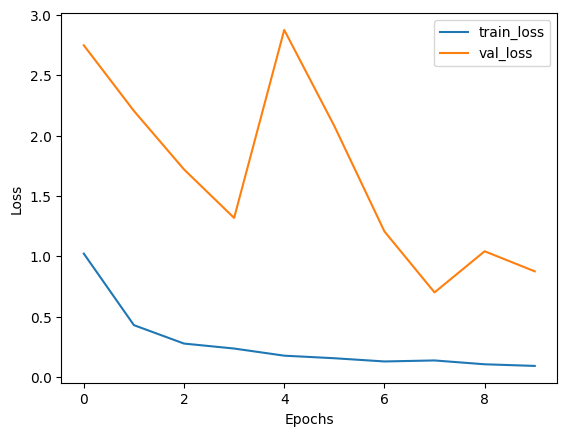

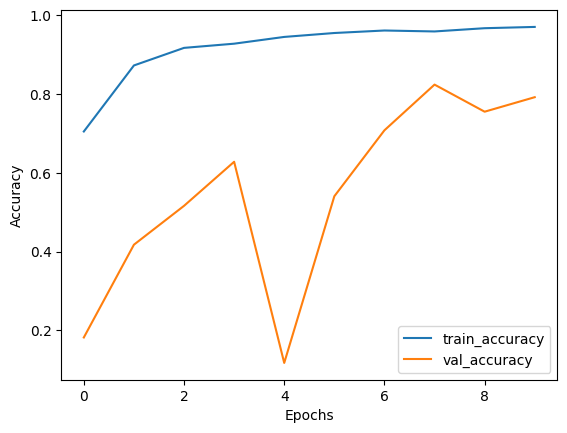

In [12]:
# 훈련 결과 시각화
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

# 검증 데이터셋에 대한 예측을 수행합니다.
# `predict` 메소드는 각 클래스에 대한 확률을 반환하므로, 가장 높은 확률을 가진 클래스 인덱스를 선택합니다.
predictions = model.predict(valid_generator)
predicted_classes = np.argmax(predictions, axis=1)

# 검증 데이터셋의 실제 레이블을 가져옵니다. 이는 `valid_generator.classes`를 사용하여 얻을 수 있습니다.
# 또한, `valid_generator`의 `shuffle` 매개변수가 False로 설정되어 있는지 확인해야 합니다.
#true_classes = valid_generator.classes

# F1 score를 계산합니다. 'macro', 'micro', 'weighted' 중 적절한 average 방식을 선택할 수 있습니다.
f1 = f1_score(y_valid1, predicted_classes, average='weighted')

# Accuracy를 계산합니다.
accuracy = accuracy_score(y_valid1, predicted_classes)

print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


In [18]:
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

# 예측 수행
predictions = model.predict(X_valid, batch_size=batch_size)
predicted_classes = np.argmax(predictions, axis=1)

# 실제 클래스 레이블 (이미 인덱스 형태로 있음)
true_classes = y_valid

# F1 Score와 Accuracy 계산
f1 = f1_score(true_classes, predicted_classes, average='weighted')
accuracy = accuracy_score(true_classes, predicted_classes)

print(f'Validation F1 Score: {f1}')
print(f'Validation Accuracy: {accuracy}')


46/46 [==============================] - 14s 185ms/step
Validation F1 Score: 0.049410634057868136
Validation Accuracy: 0.06684856753069578
